<a href="https://colab.research.google.com/github/DanielLee0226/DataSciencePortfolio/blob/main/DS_330_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Reading the data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Tagged-Data-Final.csv")

#df = pd.read_csv("vgsales.csv")
#df

In [2]:
# Finding the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   float64
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   float64
 10  Critic_Count     6894 non-null   float64
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   float64
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
 15  Story Focus      767 non-null    object 
 16  Gameplay Focus   6586 non-null   object 
 17  Series        

In [3]:
# Find how many unique values are in each genre and rating
for col in ['Genre','Rating']:
        print(df.groupby(col).size().sort_values(ascending=False))
        print("")

Genre
Action          1644
Sports           951
Shooter          868
Role-Playing     715
Racing           586
Platform         403
Misc             386
Fighting         379
Simulation       302
Strategy         278
Adventure        264
Puzzle           118
dtype: int64

Rating
T       2378
E       2082
M       1433
E10+     930
AO         1
K-A        1
RP         1
dtype: int64



In [4]:
# Data Pre-processing

# First, we will be utilizing user score and critic score
# But range of user score is 0-10 and critic score is 0-100.
# These two have different scales so we make it into same range

df['User_Score'] = df['User_Score']*10
df.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,85.0,60.0,CyberConnect2,T,x,NaN,x
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,89.0,81.0,CyberConnect2,T,x,NaN,x
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,87.0,19.0,CyberConnect2,T,x,NaN,x
3,[Prototype],2009.0,Action,Activision,0.84,0.35,0.00,0.12,1.31,78.0,83.0,78.0,356.0,Radical Entertainment,M,NaN,x,x
4,[Prototype],2009.0,Action,Activision,0.65,0.40,0.00,0.19,1.24,79.0,53.0,77.0,308.0,Radical Entertainment,M,NaN,x,x


In [5]:
unique_ratings=df[df["Rating"].isin(["AO","K-A","RP"])]
df=df.drop(unique_ratings.index)
unique_ratings

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
2243,Grand Theft Auto: San Andreas,2005.0,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95,93.0,58.0,86.0,118.0,Rockstar North,AO,NaN,x,NaN
4220,PaRappa The Rapper,1996.0,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92.0,15.0,74.0,48.0,NanaOn-Sha,K-A,NaN,x,NaN
5567,Supreme Ruler: Cold War,2011.0,Strategy,Paradox Interactive,0.00,0.03,0.00,0.01,0.03,63.0,12.0,68.0,27.0,BattleGoat Studios,RP,NaN,x,NaN


In [6]:
# Finding NAs in the data & removing unecessary data
df.isna().sum()
df=df.dropna()

In [7]:
na = df.loc[:, ("Publisher", "Year_of_Release", "Genre", "Name", "NA_Sales")]

eu = df.loc[:, ("Publisher", "Year_of_Release", "Genre", "Name", "EU_Sales")]

jp = df.loc[:, ("Publisher", "Year_of_Release", "Genre", "Name", "JP_Sales")]

gb = df.loc[:, ("Publisher", "Year_of_Release", "Genre", "Name", "Global_Sales")]


na = na[na.Year_of_Release >= 2005]
na = na[na.Year_of_Release <= 2015]
eu = eu[eu.Year_of_Release >= 2005]
eu = eu[eu.Year_of_Release <= 2015]
jp = jp[jp.Year_of_Release >= 2005]
jp = jp[jp.Year_of_Release <= 2015]
gb = gb[gb.Year_of_Release >= 2005]
gb = gb[gb.Year_of_Release <= 2015]


na = na[na.NA_Sales != 0.00]
eu = eu[eu.EU_Sales != 0.00]
jp = jp[jp.JP_Sales != 0.00]
gb = gb[gb.Global_Sales != 0.00]

In [6]:
df

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
103,Alan Wake,2010.0,Action,Microsoft Game Studios,0.66,0.50,0.05,0.13,1.33,83.0,100.0,81.0,1156.0,Remedy Entertainment,T,x,x,x
104,Alan Wake,2012.0,Action,Nordic Games,0.00,0.06,0.00,0.01,0.06,83.0,30.0,80.0,1473.0,Remedy Entertainment,T,x,x,x
107,Alice: Madness Returns,2011.0,Adventure,Electronic Arts,0.22,0.24,0.04,0.08,0.58,70.0,51.0,79.0,181.0,Spicy Horse,M,x,x,x
108,Alice: Madness Returns,2011.0,Adventure,Electronic Arts,0.27,0.14,0.04,0.04,0.50,70.0,67.0,81.0,157.0,Spicy Horse,M,x,x,x
109,Alice: Madness Returns,2011.0,Adventure,Electronic Arts,0.00,0.10,0.00,0.02,0.12,75.0,29.0,84.0,559.0,Spicy Horse,M,x,x,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,Zone of the Enders,2001.0,Shooter,Konami Digital Entertainment,0.30,0.24,0.13,0.08,0.75,78.0,21.0,74.0,49.0,KCEJ,M,x,x,x
6880,Zone of the Enders: The 2nd Runner,2003.0,Simulation,Konami Digital Entertainment,0.15,0.12,0.11,0.04,0.41,82.0,33.0,89.0,65.0,KCEJ,M,x,x,x
6881,Zone of the Enders: The Fist of Mars,2001.0,Role-Playing,Konami Digital Entertainment,0.04,0.02,0.00,0.00,0.06,71.0,12.0,90.0,9.0,WinkySoft,E,x,x,x
6882,Zone of the Enders HD Collection,2012.0,Simulation,Konami Digital Entertainment,0.21,0.07,0.09,0.05,0.42,73.0,27.0,80.0,42.0,High Voltage Software,M,x,x,x


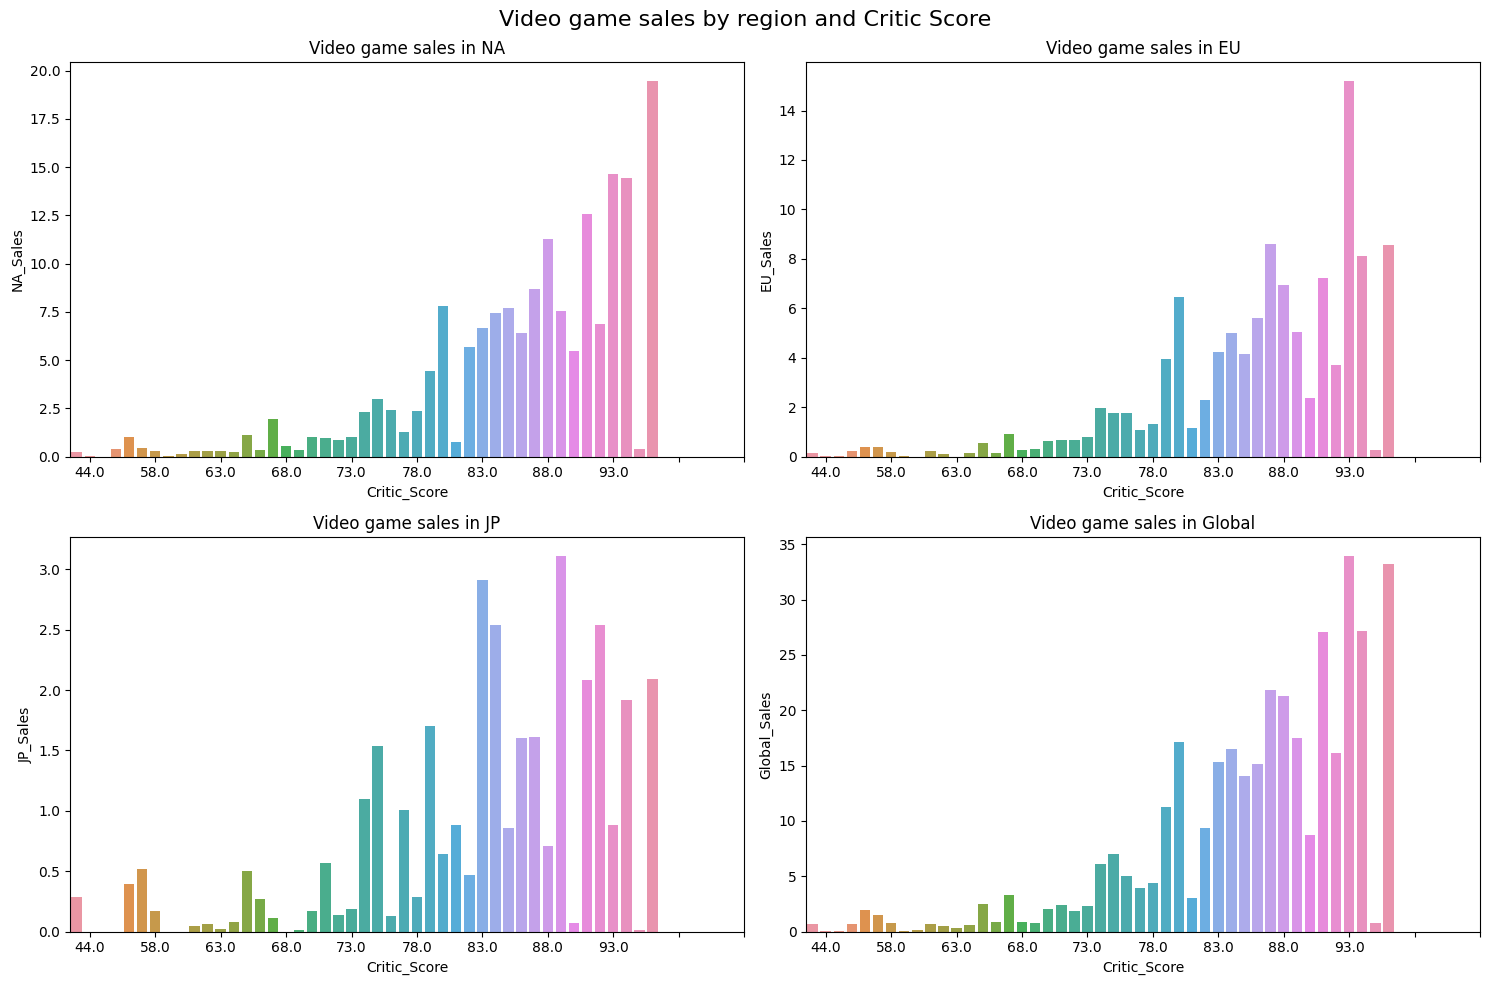

bp.png


In [28]:
# Plot 1: Barplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()
# Removing last graph because we only need 5 graphs


# Generating barplots by publisher for each country
for index, Sales in enumerate(["NA_Sales","EU_Sales","JP_Sales", "Global_Sales"]):
    ax = axs[index]
    ax.set_xlim(1, 100)
    sns.barplot(data= df, x="Critic_Score",y=Sales,
                estimator=sum,
                errorbar=None,
                ax=axs[index]).set_title("Video game sales in "+Sales.split("_Sales")[0])
    ax.set_xticks(np.arange(1, 55, 5))
    ax.set_xticklabels(ax.get_xticklabels())
   
plt.suptitle("Video game sales by region and Critic Score", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-24-61d14e57f4f2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



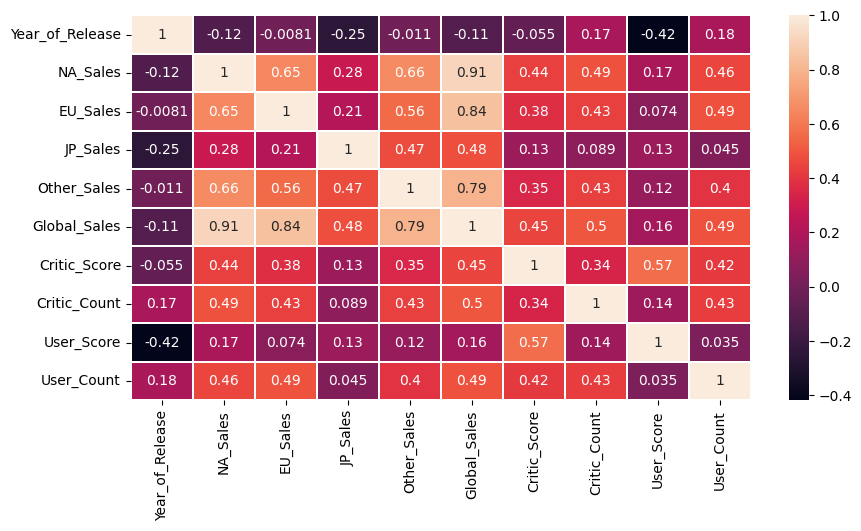

Axes(0.125,0.11;0.62x0.77)


In [24]:
# Plot 2: Heatmap
corr_ = df.corr()

plt.figure(figsize=(10, 5))

html = sns.heatmap(corr_, annot=True, linewidths=.2)

plt.show()

In [16]:
# Plot 3: Interactive scatterplot graph
import plotly.express as px
import plotly.graph_objs as go
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig_eu = px.scatter(eu, x="Year_of_Release", y="EU_Sales", color="Genre",
                 size='EU_Sales', hover_data=['Name'],
                 title="EU Video Game Sales by Genre",
                 labels={'x':'Year_of_Release', 'y':'European Sales In Millions'})

fig_eu.show()

fig_jp = px.scatter(jp, x="Year_of_Release", y="JP_Sales", color="Genre",
                 size='JP_Sales', hover_data=['Name'],
                 title="Japan Video Game Sales by Genre",
                 labels={'x':'Year_of_Release', 'y':'Japan Sales In Millions'}) 

fig_jp.show()

fig_na = px.scatter(na, x="Year_of_Release", y="NA_Sales", color="Genre",
                 size='NA_Sales', hover_data=['Name'],
                 title="North America Video Game Sales by Genre",
                 labels={'x':'Year_of_Release', 'y':'North America Sales In Millions'}) 

fig_na.show()

fig_gb = px.scatter(gb, x="Year_of_Release", y="Global_Sales", color="Genre",
                 size='Global_Sales', hover_data=['Name'],
                 title="Global Video Game Sales by Genre",
                 labels={'x':'Year_of_Release', 'y':'Global Sales In Millions'}) 

fig_gb.show()